# SD-TSIA210 - Machine Learning
## Binary classification: Ants and Grapes
### Group 2: 

*   Ferreira Torres, Bernardo
*   Morina, Alessandro
*   Souza Pinto Medeiros, Gabriel
*   Togashi De Miranda, Júlia

## Importing data and libraries

In [ ]:
import numpy as np
import random
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier


import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D

print(tf.keras.__version__)

2.4.0


In [ ]:
! git clone --recursive https://github.com/torresbf/ImagesTelecom
!unzip -qq 'ImagesTelecom/Quidraw_data.zip' 

Cloning into 'ImagesTelecom'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 14 (delta 2), reused 13 (delta 1), pack-reused 0
Unpacking objects: 100% (14/14), done.


In [ ]:
!unzip -qq 'ImagesTelecom/Quidraw_data.zip' 

replace Quidraw_data/G_1_ant.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace Quidraw_data/G_1_grapes.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
# Loads ants and grapes images, as well as test images and labels
ant = np.load('Quidraw_data/G_2_ant.npy')
grapes = np.load('Quidraw_data/G_2_grapes.npy')
test_labels = np.load('Quidraw_data/test_labels.npy')
test_images = np.load('Quidraw_data/test_images.npy')

## Exploring the data

In this sample of the Quickdraw dataset, there are two categories, ants and grapes. If an image is classified as ant, then it is labeled as 0, and if it is classified as grape, it has the label 1.

The images are encoded as a array of size 784, which corresponds to a black and white image of dimensions 28x28. The image values range from 0 to 255.

As can be seen bellow, the classes are balanced, that is, there is the same amount of data from the ant class and grape class. Therefore, no problems related to unbalanced dataset will be encountered. 

In [ ]:
print(f'Ant has shape {ant.shape}')
print(f'Grapes has shape {grapes.shape}')
print(f'test_labels has shape {test_labels.shape}')
print(f'test_images has shape {test_images.shape}')

Ant has shape (1000, 784)
Grapes has shape (1000, 784)
test_labels has shape (1000,)
test_images has shape (1000, 784)


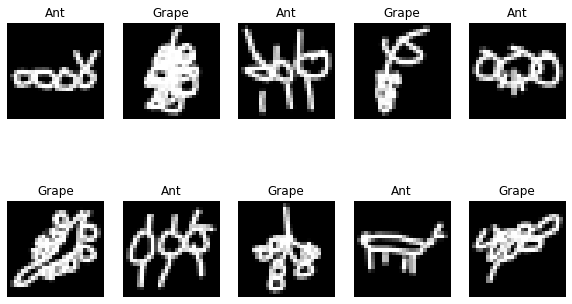

In [ ]:
# Plotting examples from first images
plt.figure(figsize=(10, 6))
i=1
for idx in range(0,5):
    plt.subplot(2, 5, i)
    plt.imshow(ant[idx].reshape(-1, 28),cmap='gray')
    plt.axis('off')
    plt.title("Ant")
    i += 1
    plt.subplot(2, 5, i)
    plt.imshow(grapes[idx].reshape(-1, 28),cmap='gray')
    plt.axis('off')
    plt.title("Grape")
    i += 1
plt.show()

As can be seen above, the drawings from both categories varies a lot (much more than the MNIST digit dataset for example). Even knowing that there are only ants and grapes, some images are difficult to classify manually (ex: the last imageexample above), therefore , **difficulties in the classification can be expected in those examples.**  

In [ ]:
# Concatenate ants and grapes and create respective labels
data = np.concatenate((ant, grapes))
labels = np.concatenate((np.zeros(len(ant)), np.ones(len(grapes))))

# Cast pixels from uint8 to float32
data = data.astype('float32')

# Imports test set
X_test = test_images.astype('float32')
y_test = test_labels

# Splits data in train and validation
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.25, random_state=0)

Below can be seen that splitting the data into train and validation still maintains the proportion between classes. It can also be seen that the test set is also equably distributed.

Text(0, 0.5, 'Proportion')

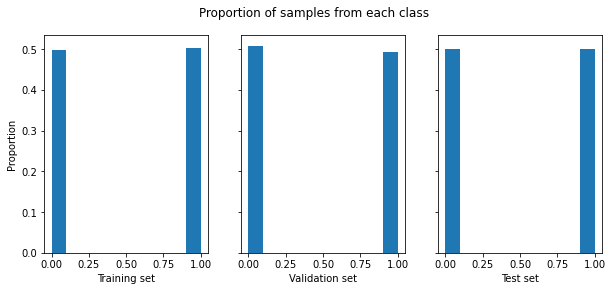

In [ ]:
fig, axs = plt.subplots(1, 3, sharey=True,figsize=(10, 4))
fig.suptitle('Proportion of samples from each class')
axs[0].hist(y_train,weights=np.ones_like(y_train)/len(y_train))
axs[0].set_xlabel('Training set')
axs[1].hist(y_val,weights=np.ones_like(y_val)/len(y_val))
axs[1].set_xlabel('Validation set')
axs[2].hist(y_test,weights=np.ones_like(y_test)/len(y_test))
axs[2].set_xlabel('Test set')
axs[0].set_ylabel('Proportion')

In [ ]:
# Normalizing the images so that they have zero mean and standard deviation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

Besides the difficult state above, related to the quality of the drawings, another problem that may be faced is the fact that we are dealing with images.


Many times, in the real world, features are extracted from images to form a dataset (for example, in medical image, getting the area, border, color of a cell) and then, the methods are run over these extracted features.


As the ant/grape problem is composed of relatively small, simple, black and gray, the group will try to apply the methods seen in the course to the pixel intensity of the vectorize images.


It’s already predicted that this approach can have some problems, for example, if most of our ant training examples are “horizontal”, an ant drawn “vertically” mighty be misclassified.
  


## Support Vector machine (SVM)

The group decided to first implement a simple linear SVM, firstly, to see the results of methods seen in the course and also to set this as a benchmark for the other more robust methods.

The c hyperparameter was chosen manually, as the one that gave better results in the overall problem. It is important to remember that c is related to the penalization for a mistake made. The higher the c, the greater is the penalization. Therefore, the c constant is the tradeoff between minimizing the model’s complexity (maximizing the margins) and allowing misclassifications.

In [ ]:
c = 0.001
clf = SVC(kernel='linear', C=c)
clf.fit(X_train, y_train)

print(f'{clf.support_vectors_.shape[0]} support vectors found')
print(f'Score on train data = {clf.score(X_train, y_train)} ')
print(f'Score on validation data = {clf.score(X_val, y_val)} ')
print(f'Score on test data = {clf.score(X_test, y_test)} ')

pred = clf.predict(X_test)

632 support vectors found
Score on train data = 0.896 
Score on validation data = 0.85 
Score on test data = 0.843 


Surprisingly, the linear SVM model already gave acceptable results. Below can be seen some examples of mistakes made in the prediction. As can be seen, some mistakes are more understandable than others.

For example, the first image in the first row is understandable (it looks more like an ant than a grape to the human eye). The second image from the first row is less understandable (it looks like an ant, its just not in the usual position that ants are represented) and can be due to the fact that, as stated above, we are only taking the pixels intensities into account.    


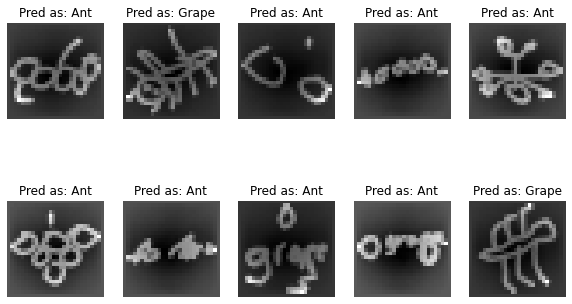

In [ ]:
#Getting array of indexes of misclassifications
error=np.ravel(np.array(np.where(np.abs(pred-np.ravel(y_test)))))  
random.Random(1).shuffle(error)
# Plotting examples from misclassifications images
plt.figure(figsize=(10, 6))
for idx in range(0,10):
    plt.subplot(2, 5, idx+1)
    plt.imshow(X_test[error[idx]].reshape(-1, 28),cmap='gray')
    plt.axis('off')
    if pred[error[idx]]==0: i="Ant"
    else: i = "Grape"
    plt.title("Pred as: " + i)
plt.show()

As seen in class, the Kernel method can be used in SVM so that the data is projected into a higher dimensional space, where it may be linearly separable by SVM. As surprisingly satisfactory results were obtained with the linear kernel, the performance with other kernels will be analyzed.


As for this problem there are a big number of hyperparameters that can influence the results, the Cross Validation was chosen to find the best ones. 


In [ ]:
# GridSearchCV defaults to 5-fold CV

params = {'kernel' : ['rbf', 'poly'],
          'C' : [.01, 0.5, 2],
          'gamma' : [.0005, .001, .05],
          'degree' : [2,4]}

svc = SVC()

clf_cv = GridSearchCV(svc, params)
clf_cv.fit(np.concatenate((X_train,X_val)), np.concatenate((y_train,y_val)))

print(f'Score on train data = {clf_cv.score(np.concatenate((X_train,X_val)), np.concatenate((y_train,y_val)))} ')
#print(f'Score on validation data = {clf_cv.score(X_val, y_val)} ')
print(f'Score on test data = {clf_cv.score(X_test, y_test)} ')
print("Best params:", clf_cv.best_params_)


Score on train data = 0.972 
Score on test data = 0.862 
Best params: {'C': 2, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf'}


*The* best resulting kernel was the rbf, and each hyperparameter can be seen above. Event though the kernel was different from linear, the results don’t vary much. 

## Random Forest

Following the methods seen in the course, the random tree model was chosen. This was due to the fact that trees usually have the problem of high variance and their advantage, high interpretability, is not very useful in this case of pixel intensity.


Random trees on the other hand, are bagging of trees, that consider only a subsample of the p features at each split, that way creating many uncorrelated bagged trees which decreases the variance and the chance of overfitting.


In [ ]:
RF=RandomForestClassifier(random_state=0)
p_grid_RF = {'n_estimators': [10,15,20,25,30], 'min_samples_leaf': [2,3,4,5,6], 'max_features': ['sqrt','log2']}   

grid_RF = GridSearchCV(estimator=RF, param_grid=p_grid_RF, scoring="accuracy", cv=5)
grid_RF.fit(np.concatenate((X_train,X_val)), np.concatenate((y_train,y_val)))

best_params_f= grid_RF.best_params_

print("Best Validation Score: {}".format(grid_RF.best_score_))
print("Best params: {}".format(grid_RF.best_params_))
print("Random Forest test score :",grid_RF.score(X_test,y_test))

Best Validation Score: 0.8540000000000001
Best params: {'max_features': 'sqrt', 'min_samples_leaf': 6, 'n_estimators': 30}
Random Forest test score : 0.847


In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(np.concatenate((X_train,X_val)), np.concatenate((y_train,y_val)))


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

For the same reason as the kernel-SVM, (large number of hyperparameters), the chosen approach was to use a Cross-Validation to determine the best parameters. The results were similar to the ones found above with the SVM.

## Neural Network approach

Due to the similarity of this problem with the MNIST dataset seen in class, one obvious choice of method is a multi-layer perceptron (MLP). First, a simple network will be defined with one hidden-layer. The Relu function will be used in this hidden layer and, as it’s a binary classification problem, the sigmoid function on the output.

$$ (784) \rightarrow (300) \rightarrow (1) $$


Some other implementation choices that are worth mentioning is the use of Dropout regularization. Dropout involves randomly turning off neurons. This removes
different paths in the network aiming to find robust connections to represent the data, thus avoiding overfitting.


Also, for the optimization Adam will be used. At the same time, it takes advantage of the momentum (a term added to the gradient update which helps stabilize training) and normalizes the learning rate by the recent
magnitude of the gradient.


In [ ]:
# Defining an architecture
input_shape = 784
hidden_1 = 300
output_shape = 1

model = Sequential()
model.add(Dense(hidden_1, input_shape=(input_shape,),activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(output_shape, activation='sigmoid', input_shape=(hidden_1, )))


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 301       
Total params: 235,801
Trainable params: 235,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs = 10
batch_size = 64

print('Training')
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data = (X_val, y_val))  

Training
Epoch 1/10
24/24 [==============================] - 0s 7ms/step - loss: 0.4217 - accuracy: 0.7907 - val_loss: 0.6257 - val_accuracy: 0.7720
Epoch 2/10
24/24 [==============================] - 0s 5ms/step - loss: 0.2690 - accuracy: 0.8887 - val_loss: 0.5727 - val_accuracy: 0.8160
Epoch 3/10
24/24 [==============================] - 0s 5ms/step - loss: 0.2278 - accuracy: 0.9213 - val_loss: 0.5483 - val_accuracy: 0.8300
Epoch 4/10
24/24 [==============================] - 0s 5ms/step - loss: 0.2098 - accuracy: 0.9300 - val_loss: 0.5372 - val_accuracy: 0.8420
Epoch 5/10
24/24 [==============================] - 0s 5ms/step - loss: 0.1978 - accuracy: 0.9300 - val_loss: 0.5367 - val_accuracy: 0.8520
Epoch 6/10
24/24 [==============================] - 0s 5ms/step - loss: 0.1871 - accuracy: 0.9493 - val_loss: 0.5384 - val_accuracy: 0.8580
Epoch 7/10
24/24 [==============================] - 0s 5ms/step - loss: 0.1648 - accuracy: 0.9560 - val_loss: 0.5386 - val_accuracy: 0.8600
Epoch 8/10


Evaluating the model on test data

In [ ]:
model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 2ms/step - loss: 0.4234 - accuracy: 0.8510


[0.42344990372657776, 0.8510000109672546]

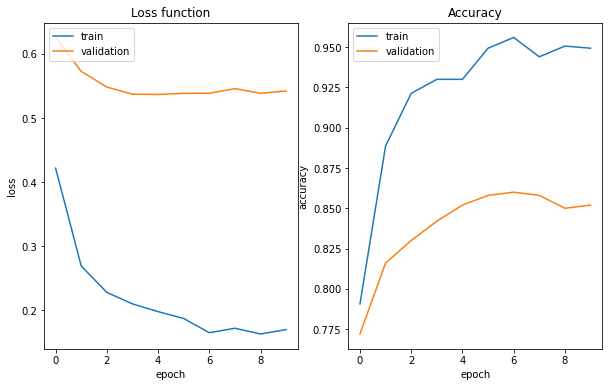

In [ ]:
# summarize history for loss
fig, axs = plt.subplots(1, 2,figsize=(10, 6))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].set_title('Loss function')
axs[0].set_ylabel('loss')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'validation'], loc='upper left')

# summarize history for accuracy
axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].set_title('Accuracy')
axs[1].set_ylabel('accuracy')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'validation'], loc='upper left')

plt.show()

As can be seen in the results of the epochs and also more clearly in both graphs above, even this simple network seems to overfit our problem. At first, this seems strange, especially as this similar network gave good results for the MNIST dataset. At the same time, it is important to highlight that this problem has at its disposal a total of 2000 images, divided between train and validation. As for the MNIST dataset, there were 60000 images.

## Looking for Better Results

In MLPs each layer of the network contained fully connected layers. One drawback of that approach is that each hidden unit is connected to each input unit, in a way that there is high redundancy in these weights. For many types of data with grid-like topological structures (for example images), the number of parameters increase rapidly and usually in an unnecessary way. 


For that reason, convolution operation is often extremely useful. It not only reduces the number of parameters to train, making the training faster, but also minimizes the chance of falling into a local minimum during optimization.
The CNN can easily be implemented in Keras substituting the Dense layers for Conv2D layers.


One other advantage of using CNN is that we can obtain shift invariance property through Max pooling, that is, being able to detect objects wherever they are in the image.


Therefore, a simple classification CNN architecture often consists of:

$$ Convolution \rightarrow biases\rightarrow non-linearities \rightarrow  subsampling $$

After this, a classification section is used:

$$Fully connected layer \rightarrow non-linearity $$

One last remark is that we can perform data augmentation, which is a technique to increase the diversity of the training set by applying random (but realistic) transformations such as image rotation.


In [ ]:
# number of convolutional filters to use
nb_filters = 32
# convolution kernel size
kernel_size = (3, 3)
# size of pooling area for max pooling
pool_size = (2, 2)

# data augmentation
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling((-0.1,0.1)),
  tf.keras.layers.experimental.preprocessing.RandomTranslation(height_factor=(-0.1, 0.1),width_factor=(-0.1, 0.1)),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.1)
])

# model definition
model_cnn = Sequential()
model_cnn.add(data_augmentation)
model_cnn.add(Conv2D(16, 3, padding='same', activation='relu'))
model_cnn.add(MaxPooling2D())
model_cnn.add(Conv2D(nb_filters,kernel_size,activation='relu',strides=(1, 1), padding="same", input_shape=(28,28,1)))
model_cnn.add(Dropout(0.2))
model_cnn.add(Conv2D(nb_filters,kernel_size,activation='relu',strides=(1, 1), padding="same"))
model_cnn.add(Dropout(0.2))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(1,activation='sigmoid'))


model_cnn.build((X_train.shape[0],28,28,1))

learning_rate = 0.005

model_cnn.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=learning_rate),metrics=["accuracy"])
model_cnn.summary()

n_epochs = 30
batch_size = 64

# fit model
history_cnn = model_cnn.fit(X_train.reshape((X_train.shape[0],28,28,1)), y_train, epochs=n_epochs, batch_size=batch_size, validation_data = (X_val.reshape((X_val.shape[0],28,28,1)), y_val))

# Results
score = model_cnn.evaluate(X_test.reshape((X_test.shape[0],28,28,1)), y_test, verbose=False)
predict_cnn = model_cnn.predict(X_test.reshape((X_test.shape[0],28,28,1)))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_25 (Sequential)   (1500, 28, 28, 2)         0         
_________________________________________________________________
conv2d_36 (Conv2D)           (1500, 28, 28, 16)        304       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (1500, 14, 14, 16)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (1500, 14, 14, 32)        4640      
_________________________________________________________________
dropout_25 (Dropout)         (1500, 14, 14, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (1500, 14, 14, 32)        9248      
_________________________________________________________________
dropout_26 (Dropout)         (1500, 14, 14, 32)      

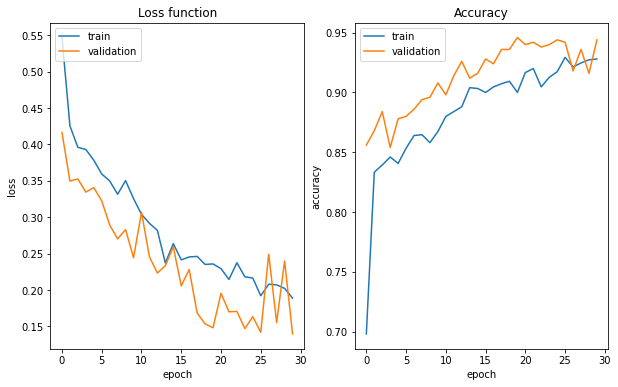

In [ ]:
# summarize history for loss
fig, axs = plt.subplots(1, 2,figsize=(10, 6))
axs[0].plot(history_cnn.history['loss'])
axs[0].plot(history_cnn.history['val_loss'])
axs[0].set_title('Loss function')
axs[0].set_ylabel('loss')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'validation'], loc='upper left')

# summarize history for accuracy
axs[1].plot(history_cnn.history['accuracy'])
axs[1].plot(history_cnn.history['val_accuracy'])
axs[1].set_title('Accuracy')
axs[1].set_ylabel('accuracy')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'validation'], loc='upper left')

plt.show()

As can be seen in the graph above, the CNN method really seams to be able to improve our results (from around 85% for the other methods to around 93.5%). One remark on the accuracy and loss evaluation graphs is that sometimes the validation results are better than the train ones. This is normal as we are using Dropout (the turned off neurons are turned back on in the validation step).

Overall, an error rate was expected due to the quality of the drawings. However, otherwise the other methods, the CNN seems to better generalize the data, being able to classify ants that are not in the “standard “position of ant drawings, so as grapes.

 


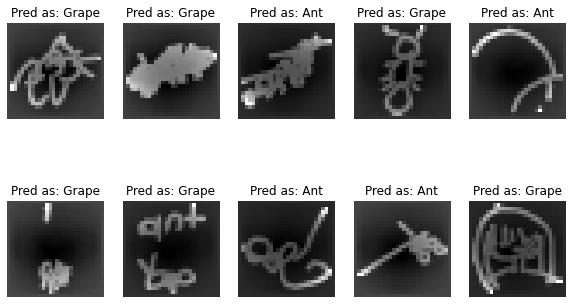

In [ ]:
#Turning Keras probability result to binary 
c=np.zeros(predict_cnn.size)
for i in range(predict_cnn.size):
  if predict_cnn[i] <0.5:
    c[i]=0
  else:
    c[i]=1

# Getting array of indexes of misclassifications
error=np.ravel(np.array(np.where(np.abs(c-np.ravel(y_test)))))  
random.Random(1).shuffle(error)

# Plotting examples from misclassifications  images
plt.figure(figsize=(10, 6))
for idx in range(0,10):
    plt.subplot(2, 5, idx+1)
    plt.imshow(X_test[error[idx]].reshape(-1, 28),cmap='gray')
    plt.axis('off')
    if c[error[idx]]==0: i="Ant"
    else: i = "Grape"
    plt.title("Pred as: " + i)
plt.show()

Having a look again to some examples of mistakes made in the classification, it can be seen that now, more that in the linear SVM case, the mistakes are really mostly unrecognizable blobs. This shows that the CNN in fact probably did a better job generalizing ants and grapes, that is, its able to detect ants that look like ants in multiple positions, as well for the grapes.